In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import UnivariateSpline

In [2]:
day = "day_1"

In [3]:
with open(f"data/{day}/lpf.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [4]:
interpolation_funcs = {}

for mat in ["air", "sample"]:
    interpolation_funcs[mat] = {}
    for sensor in range(8):
        interpolation_funcs[mat][sensor] = {}
        for heater in range(10):
            heater_step = sensor_data[mat][sensor][heater]
            filtered = heater_step["Filtered"].values
            time = heater_step["Time Since PowerOn"].values
            interpolation_func = UnivariateSpline(time, filtered, s=0)
            interpolation_funcs[mat][sensor][heater] = interpolation_func
            print(mat, sensor, heater)
        print("-" * 50)

air 0 0
air 0 1
air 0 2
air 0 3
air 0 4
air 0 5
air 0 6
air 0 7
air 0 8
air 0 9
--------------------------------------------------
air 1 0
air 1 1
air 1 2
air 1 3
air 1 4
air 1 5
air 1 6
air 1 7
air 1 8
air 1 9
--------------------------------------------------
air 2 0
air 2 1
air 2 2
air 2 3
air 2 4
air 2 5
air 2 6
air 2 7
air 2 8
air 2 9
--------------------------------------------------
air 3 0
air 3 1
air 3 2
air 3 3
air 3 4
air 3 5
air 3 6
air 3 7
air 3 8
air 3 9
--------------------------------------------------
air 4 0
air 4 1
air 4 2
air 4 3
air 4 4
air 4 5
air 4 6
air 4 7
air 4 8
air 4 9
--------------------------------------------------
air 5 0
air 5 1
air 5 2
air 5 3
air 5 4
air 5 5
air 5 6
air 5 7
air 5 8
air 5 9
--------------------------------------------------
air 6 0
air 6 1
air 6 2
air 6 3
air 6 4
air 6 5
air 6 6
air 6 7
air 6 8
air 6 9
--------------------------------------------------
air 7 0
air 7 1
air 7 2
air 7 3
air 7 4
air 7 5
air 7 6
air 7 7
air 7 8
air 7 9
---

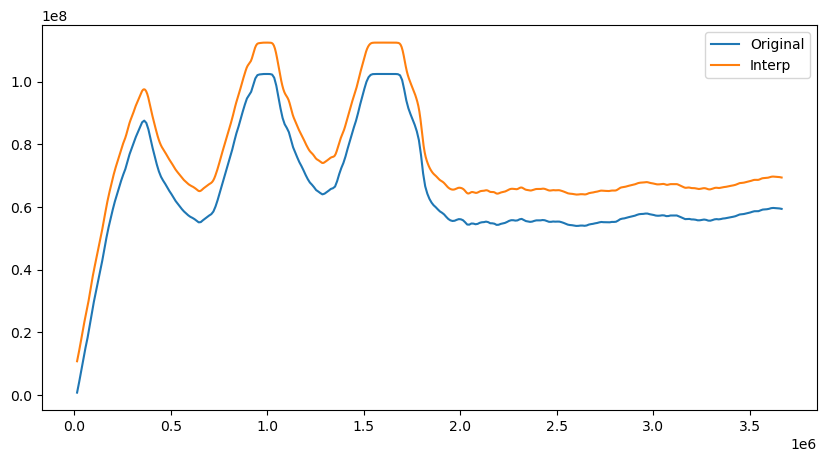

In [5]:
mat = "sample"
sensor = 2
heater_step = 5
heater = sensor_data[mat][sensor][heater_step]
gas_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values
interpolation_func = interpolation_funcs[mat][sensor][heater_step]
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(interpolated_time, interpolated_data + 1e7, label="Interp")
# plt.yscale("log")
plt.legend()
plt.show()

In [6]:
with open(f"data/{day}/interpolation_functions.pkl", "wb") as f:
    pickle.dump(interpolation_funcs, f)